<a href="https://colab.research.google.com/github/himanshu530/datasciencewithmarco/blob/master/ds_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('Advertising.csv',index_col=0)

In [3]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


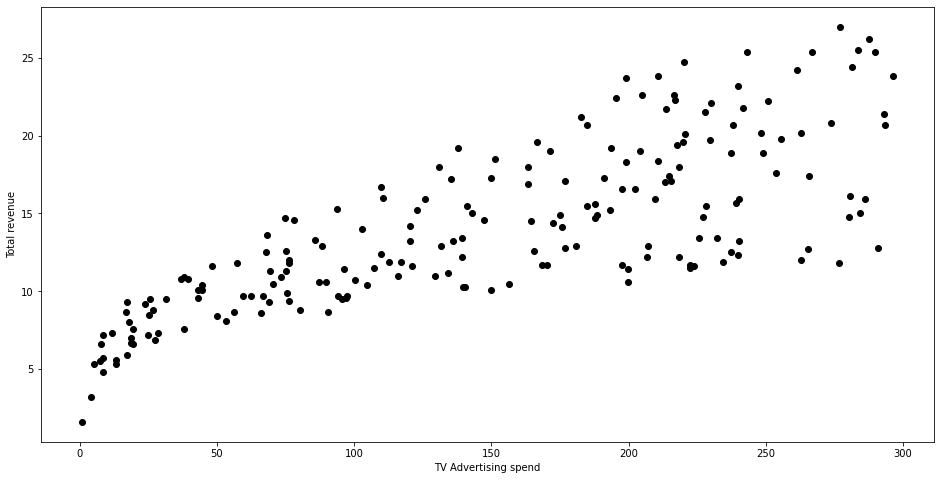

In [5]:
#Linear Regression

## 1. Predicting only with one feature

plt.figure(figsize=(16,8))
plt.scatter(data['TV'],data['sales'],c='black')
plt.xlabel('TV Advertising spend')
plt.ylabel('Total revenue')
plt.show()

In [7]:
# adding model
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X,y)

print(reg.intercept_[0])
print(reg.coef_[0][0])

7.032593549127695
0.04753664043301975


In [10]:
#The equation will be

print(f"The Linear model is: \n Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV")

The Linear model is: 
 Y = 7.032593549127695 + 0.04753664043301975*TV


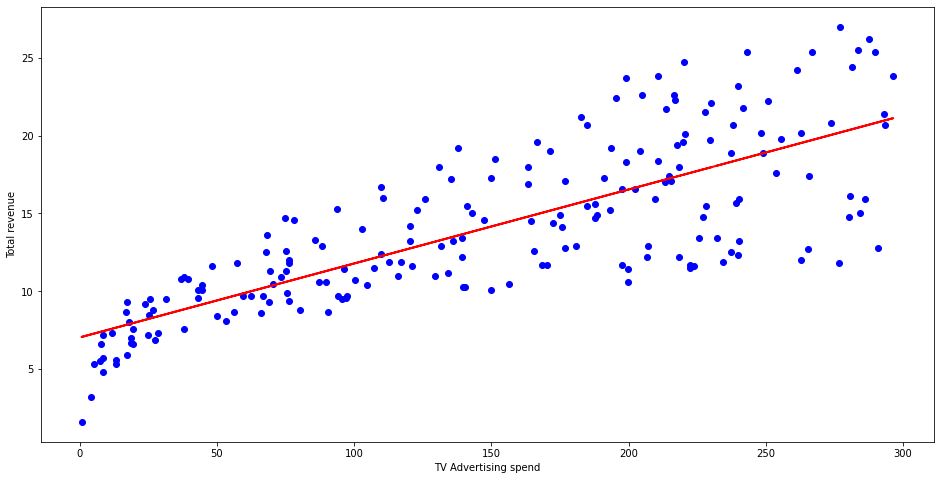

In [13]:
predictions = reg.predict(X)

plt.figure(figsize=(16,8))

plt.scatter(X,y,c = 'blue')
plt.plot(X,predictions,c='red',linewidth=2)
plt.xlabel('TV Advertising spend')
plt.ylabel('Total revenue')
plt.show()

In [15]:
# Mulitple linear regression

Xs = data.drop(['sales'],axis=1)
y = data['sales'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(Xs,y)


print(f"The Linear model is: \n Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV +{reg.coef_[0][1]}*Radio + {reg.coef_[0][2]}*Newspaper ")


The Linear model is: 
 Y = 2.938889369459412 + 0.0457646454553976*TV +0.18853001691820448*Radio + -0.0010374930424763285*Newspaper 


In [17]:
#Classification 
# Eg. Spam detection,Fraud detection,Classifying into categories

In [18]:
#Classification with logistic regresison

#Output is between 0 and 1 . It gives the probability
#Sigmoid function is used

#Not the best to predict more than two classes

#Bayes classifier is used for multiclass classification



In [19]:
# Classifiying mushrooms as edible or poisonous

import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import roc_curve,auc,confusion_matrix
 

In [20]:
data = pd.read_csv('mushrooms.csv')

In [21]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


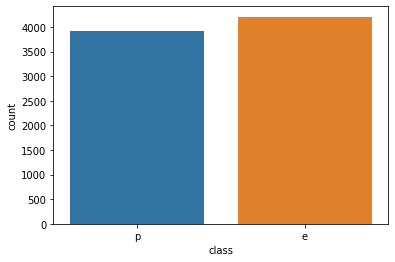

In [22]:
#to check if target is balanced
x = data['class']
ax = sns.countplot(x=x,data=data)

In [23]:
def plot_data(hue,data):
  for i, col in enumerate(data.columns):
    plt.figure(i)
    ax = sns.countplot(x=data[col],hue=hue,data=data)

In [24]:
## PreProcessing

In [25]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [26]:
#Label encoder will transform class column into 1 and 0
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [27]:
# One hot encoding the resr of the dataset

encoded_data = pd.get_dummies(data)
encoded_data.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,...,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [28]:
#Model

In [29]:
y = data['class'].values.reshape(-1,1)
X = encoded_data.drop(['class'],axis=1)

#Splitting the data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,y_train.ravel())
y_prob = model1.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob>0.5,1,0)

In [32]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [33]:
log_confusion_matrix = confusion_matrix(y_test,y_pred)
log_confusion_matrix

array([[843,   0],
       [  0, 782]])

In [34]:
#All prediucted correctly . WTf😂😂

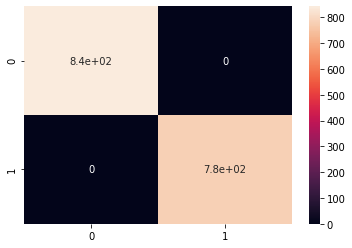

In [35]:
sns.heatmap(log_confusion_matrix,annot=True)

In [36]:
 false_positive_rate,true_positive_rate, thresholds = roc_curve(y_test,y_prob)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc 

#roc_auc = area under the roc curve( 1 = optimal)

1.0

In [37]:
#Plotting the roc curve
def plot_roc(roc_auc):
  plt.figure(figsize=(7,7))
  plt.title('ROC')
  plt.plot(false_positive_rate,true_positive_rate,color='red',)
  plt.plot([0,1],[0,1],linestyle='--')
  plt.axis('tight')
  plt.ylabel('true_positive_rate')
  plt.xlabel('false_positive_rate')

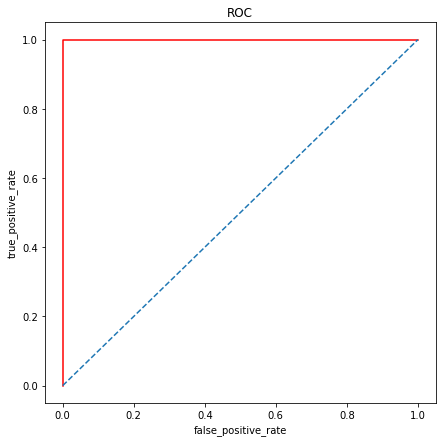

In [38]:
plot_roc(roc_auc)

In [39]:
# Two more Algorithms for Classification:
# LinearDiscriminantaAnalysis (LDA) (Code is similar)
# QuadraticDiscriminantAnalysis (QDA) 

Resampling and Redistribution

In [40]:
# K fold cross validation is the most widely used method o evaluate the model
data = pd.read_csv('Advertising.csv')

In [41]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [44]:
#plot the target against each feature
def scatter_plot(feature):
  plt.figure(figsize=(10,5))
  plt.scatter(data[feature],data['sales'],c = 'black')
  plt.show()

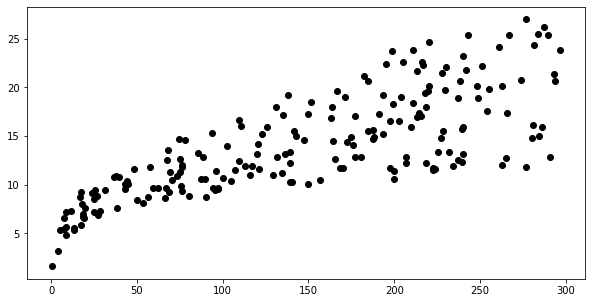

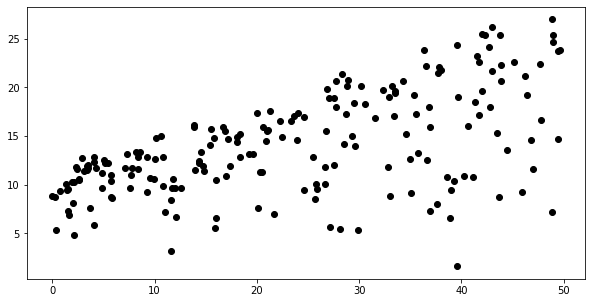

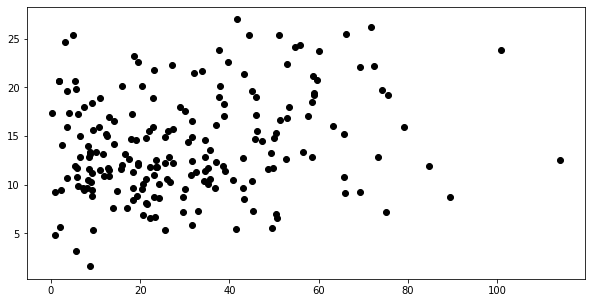

In [45]:
scatter_plot('TV')
scatter_plot('radio')
scatter_plot('newspaper')


In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


In [47]:
X = data.drop(['sales'],axis=1)
y = data['sales'].values.reshape(-1,1)


In [49]:
model = LinearRegression()
MSE = cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)

mean_MSE = np.mean(MSE)

print(-mean_MSE)

3.1481607356471937


In [50]:
# How reularization will imporove the baseline model
# 1.Ridge Regression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge



In [51]:
ridge = Ridge()

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}

ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

ridge_regressor.fit(X,y);

In [53]:
print(ridge_regressor.best_params_)
print(-ridge_regressor.best_score_)

{'alpha': 20}
3.147915744583589


In [55]:
# 2. Lasso (L1 Regularization)

from sklearn.linear_model import Lasso  
#Similar code to ridge regression

**Decision Trees** 